In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

y = df.iloc[:, 0]   # Year
X = df.iloc[:, 1:]  # Features

DF:(252175, 91)


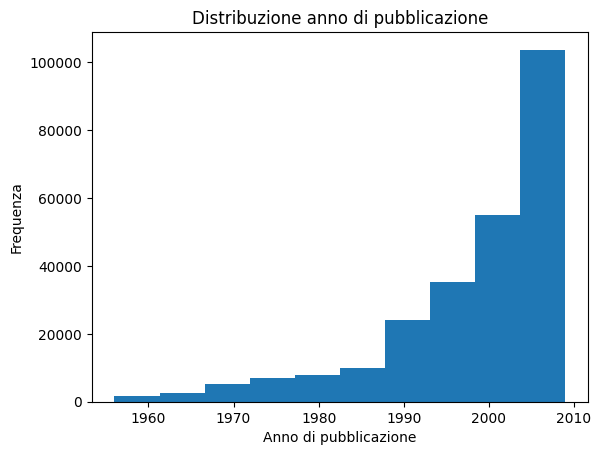

DF DROP:(196925, 91)


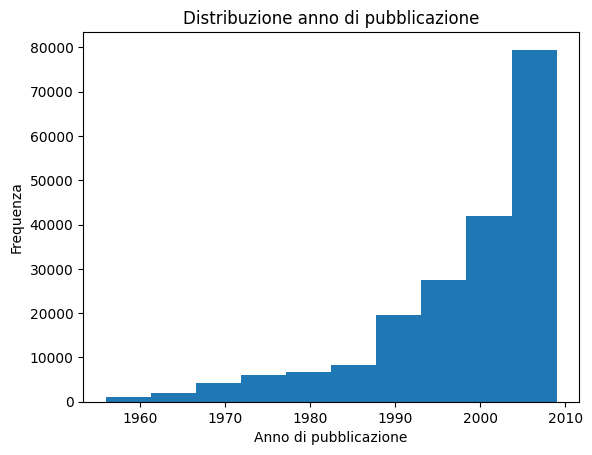

In [9]:

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(X)


from scipy.stats import zscore

# Identify and remove outliers using Z-score
z_scores = zscore(df_normalized)
df_no_outliers =df[(z_scores < 3).all(axis=1)]

print(f'DF:{df.shape}')


y = df_no_outliers.iloc[:, 0]   # Year
X = df_no_outliers.iloc[:, 1:]  # Features

plt.hist(df['Year'])
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()


print(f'DF DROP:{df_no_outliers.shape}')


plt.hist(y)
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()




/Users/acco/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 283409.45181| train_rmse: 12.23769| test_rmse: 12.1095 |  0:01:15s
epoch 1  | loss: 140.44116| train_rmse: 11.49027| test_rmse: 11.42187|  0:02:32s
epoch 2  | loss: 134.1589| train_rmse: 13.04506| test_rmse: 12.91906|  0:03:46s
epoch 3  | loss: 129.86295| train_rmse: 11.60016| test_rmse: 11.4634 |  0:04:59s
epoch 4  | loss: 126.44685| train_rmse: 15.10977| test_rmse: 14.3844 |  0:06:13s
epoch 5  | loss: 116.40182| train_rmse: 13.51167| test_rmse: 12.82172|  0:07:29s
epoch 6  | loss: 103.06686| train_rmse: 10.76703| test_rmse: 10.64251|  0:08:39s
epoch 7  | loss: 103.78022| train_rmse: 10.21761| test_rmse: 9.98269 |  0:09:52s
epoch 8  | loss: 94.37968| train_rmse: 13.82649| test_rmse: 13.57549|  0:11:01s
epoch 9  | loss: 93.45887| train_rmse: 11.21375| test_rmse: 11.14942|  0:12:18s
epoch 10 | loss: 90.40116| train_rmse: 10.43821| test_rmse: 10.33287|  0:13:32s
epoch 11 | loss: 91.15576| train_rmse: 10.24942| test_rmse: 10.18327|  0:14:52s
epoch 12 | loss: 90.48031| tra

/Users/acco/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Root Mean Squared Error (RMSE): 70.73480522290536


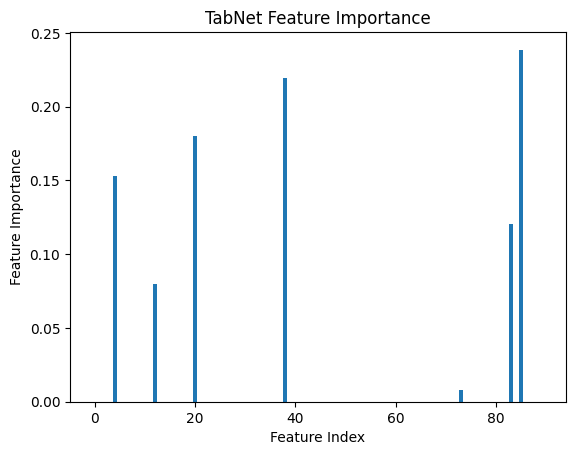

In [14]:
# Import necessari
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Supponendo che tu abbia già eseguito il pre-processing come descritto nel tuo codice

# Divisione del dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape del target per renderlo bidimensionale
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Inizializzazione del modello TabNetRegressor
model = TabNetRegressor()

# Addestramento del modello
model.fit(
    X_train.values,
    y_train_reshaped,  # Utilizza il target reshaped
    eval_set=[(X_train.values, y_train_reshaped), (X_test.values, y_test_reshaped)],
    eval_name=["train", "test"],
    eval_metric=["rmse"],
    max_epochs=100,
    patience=20,
    batch_size=64,
    virtual_batch_size=32,
)

# Predizione sui dati di test
y_pred = model.predict(X_test.values)

# Calcolo dell'errore di regressione (RMSE)
rmse = mean_squared_error(y_test_reshaped, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualizzazione delle feature importance di TabNet
feat_importances = model.feature_importances_
plt.bar(range(len(feat_importances)), feat_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('TabNet Feature Importance')
plt.show()
